<a href="https://colab.research.google.com/github/Vinit1999/Data-Science/blob/main/Projects/Data_Science_Project_NYSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fundamentals.csv')
df1 = pd.read_csv('securities.csv')
df2 = pd.read_csv('prices.csv')
df3 = pd.read_csv('prices-split-adjusted.csv')

In [3]:
df3.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
# for prices-split-adjusted

In [5]:
print(df3['date'].min())
print(df3['date'].max())

2010-01-04
2016-12-30


In [6]:
print(df3['symbol'].min())
print(df3['symbol'].max())

A
ZTS


In [7]:
df3['symbol']

0         WLTW
1         WLTW
2         WLTW
3         WLTW
4         WLTW
          ... 
851259     ZBH
851260    ZION
851261     ZTS
851262     AIV
851263     FTV
Name: symbol, Length: 851264, dtype: object

In [8]:
from tabulate import tabulate
info = [[col, df3[col].count(), df3[col].max(), df3[col].min()] for col in df3.columns]
print(tabulate(info, headers = ['Feature', 'Count', 'Maximum', 'Minimum'], tablefmt= 'orgtbl'))

| Feature   |   Count | Maximum     | Minimum    |
|-----------+---------+-------------+------------|
| date      |  851264 | 2016-12-30  | 2010-01-04 |
| symbol    |  851264 | ZTS         | A          |
| open      |  851264 | 1584.439941 | 1.66       |
| close     |  851264 | 1578.130005 | 1.59       |
| low       |  851264 | 1549.939941 | 1.5        |
| high      |  851264 | 1600.930054 | 1.81       |
| volume    |  851264 | 859643400.0 | 0.0        |


In [9]:
df3 = df3.drop(['date'], axis = 1)

In [10]:
# aim to predicting Apple, Google and Amazon stocks. Ticker symbol for the respective companies are AAPL, GOOGL and AMZN.
print(df3[df3['symbol'] == 'AAPL'].shape)
print(df3[df3['symbol'] =='GOOGL'].shape)
print(df3[df3['symbol'] == 'AMZN'].shape)

(1762, 6)
(1762, 6)
(1762, 6)


In [12]:
#load data for Apple, Google and Amazon stocks.

df3 = df3[(df3['symbol'] == 'AAPL') | (df3['symbol'] == 'GOOGL') | (df3['symbol'] == 'AMZN')].reset_index(drop = True)

In [13]:
df3.head(2)

,symbol,open,close,low,high,volume
0,AAPL,30.49,30.572857,30.340000,30.642857,123432400.0
1,AMZN,136.25,133.899994,133.139999,136.610001,7599900.0


In [14]:
import sklearn.preprocessing
onehot_encoder = sklearn.preprocessing.OneHotEncoder(sparse=False)

In [15]:
onehot_encoder.fit_transform(df3[['symbol']])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [16]:
onehot_encoder.get_feature_names()

array(['x0_AAPL', 'x0_AMZN', 'x0_GOOGL'], dtype=object)

In [17]:
df3_symbol = pd.DataFrame(onehot_encoder.fit_transform(df3[['symbol']]), columns=onehot_encoder.get_feature_names(), dtype=int)

In [18]:
df3_symbol

,x0_AAPL,x0_AMZN,x0_GOOGL
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0
...,...,...,...
5281,0,1,0
5282,0,0,1
5283,1,0,0
5284,0,1,0


In [19]:
df3 = pd.concat([df3, df3_symbol], axis=1)

In [20]:
df3.head(5)

,symbol,open,close,low,high,volume,x0_AAPL,x0_AMZN,x0_GOOGL
0,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0,1,0,0
1,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0,0,1,0
2,GOOGL,313.788792,313.688694,312.432438,315.070073,3908400.0,0,0,1
3,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0,1,0,0
4,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0,0,1,0


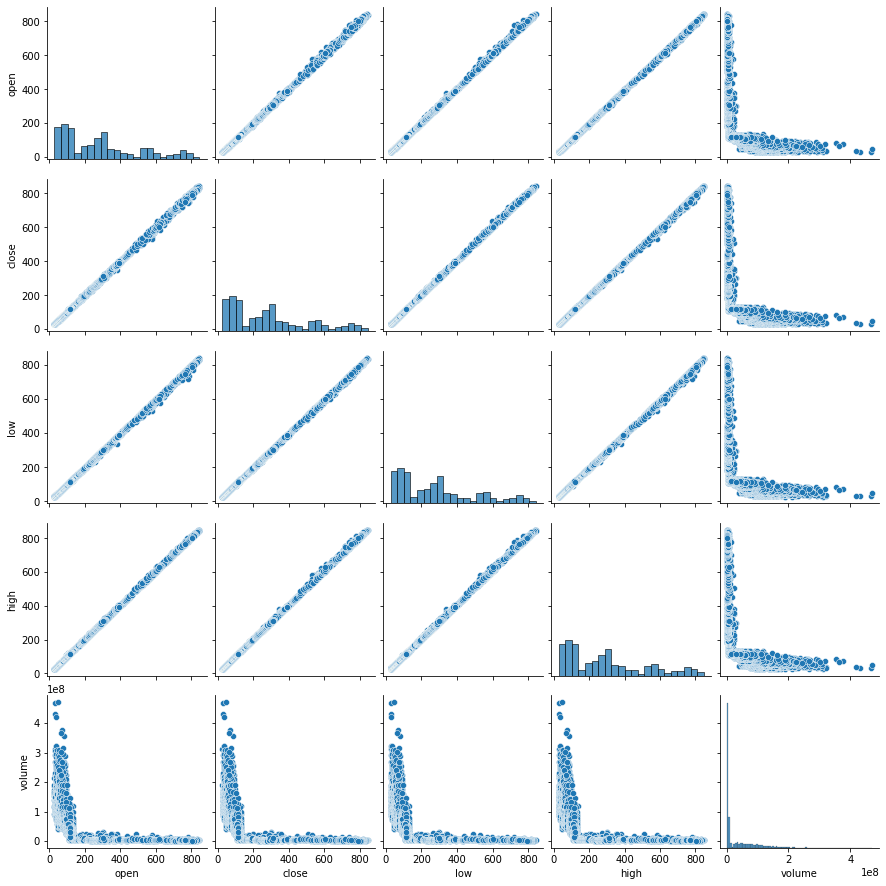

In [21]:
sns.pairplot(df3.drop(['x0_AAPL', 'x0_AMZN', 'x0_GOOGL'], axis = 1))

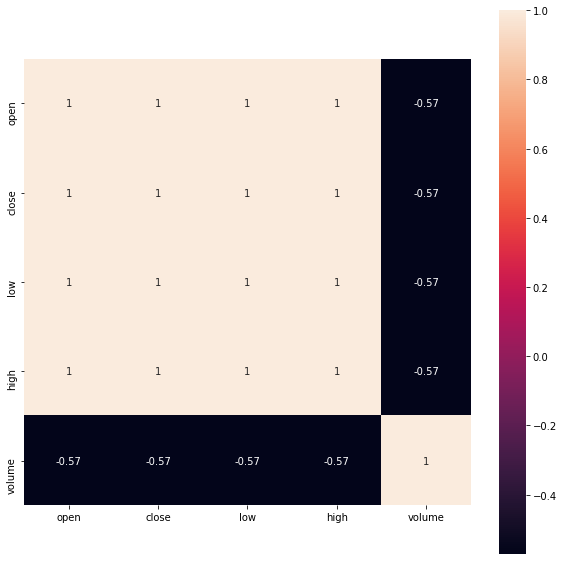

In [22]:
plt.figure(figsize = (10,10))
mat = df3.drop(['x0_AAPL', 'x0_AMZN', 'x0_GOOGL'], axis = 1).corr()
sns.heatmap(mat, annot = True, square = True)

In [23]:
df3['open'].unique()

array([ 30.48999971, 136.25      , 313.78879179, ..., 116.650002  ,
       766.469971  , 803.210022  ])

In [24]:
df3.head(1)

,symbol,open,close,low,high,volume,x0_AAPL,x0_AMZN,x0_GOOGL
0,AAPL,30.49,30.572857,30.34,30.642857,123432400.0,1,0,0


In [25]:
# re arranging colunm of dataset
df3=df3.reindex(columns=['symbol','x0_AAPL','x0_AMZN','x0_GOOGL','open','low','high','volume','close'])

In [26]:
df3.head(1)

,symbol,x0_AAPL,x0_AMZN,x0_GOOGL,open,low,high,volume,close
0,AAPL,1,0,0,30.49,30.34,30.642857,123432400.0,30.572857


In [27]:
X = df3.iloc[:,1:8]
y =df3.iloc[:,8]

In [28]:
y.shape

(5286,)

In [29]:
X.shape


(5286, 7)

In [30]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [33]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [34]:
print(y.min())
print(y.max())

27.435714714299998
844.3599849999999


In [35]:
X_train.shape, X_test.shape


((4228, 7), (1058, 7))

In [36]:
y_train.shape, y_test.shape

((4228,), (1058,))

In [37]:
from sklearn import linear_model

In [38]:
model = linear_model.LinearRegression()

In [39]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
predictions = model.predict(X_train)

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2 = r2_score(y_train, predictions)
print("R2 Score :", r2)

R2 Score : 0.9999221034469677


In [43]:
predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
print("R2 Score :", r2)

R2 Score : 0.9999180845615304


In [46]:
# decision tree 

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [47]:
dtr.fit(X_train,y_train)
predicts=dtr.predict(X_test)
prediction=pd.DataFrame(predicts)
R_2=r2_score(y_test,prediction)

In [48]:
R_2

0.9997337024414938

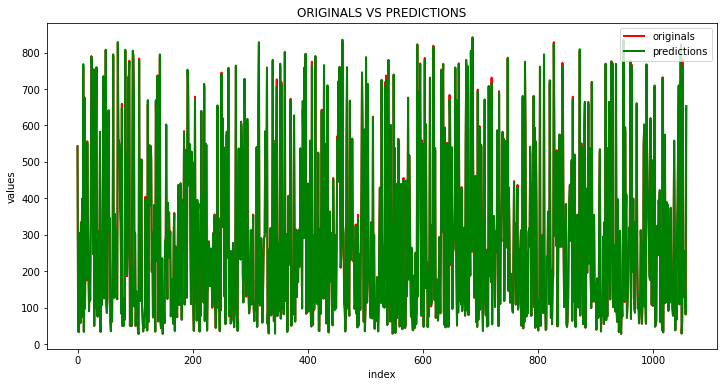

In [49]:
# prediction vs original values 
test_index=y_test.reset_index()["close"]
ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
plt.legend(loc='upper right')
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")
plt.show()

In [50]:
# for securities dataset
df1.head(5)


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [52]:
df1.describe()

,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [53]:
df1.isnull().sum()

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [54]:
fea = df1

In [55]:
# security with stating mic

fea.loc[fea.Security.str.startswith("Mic"), :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
303,KORS,Michael Kors Holdings,reports,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","New York, New York",2013-11-13,1530721
304,MCHP,Microchip Technology,reports,Information Technology,Semiconductors,"Chandler, Arizona",2007-09-07,827054
305,MU,Micron Technology,reports,Information Technology,Semiconductors,"Boise, Idaho",1994-09-27,723125
306,MSFT,Microsoft Corp.,reports,Information Technology,Systems Software,"Redmond, Washington",1994-06-01,789019
